<h2 style = "text-align:center" ><b>EEG</b> - Prédiction des Mouvements Imaginaires de la Main</h2>

---

# **1. Description du projet - Introduction :**
- L’électroencéphalogramme (EEG) est une technique d’imagerie cérébrale utilisée pour étudier les activités du cerveau.  
En plaçant des capteurs sur le cuir chevelu, l’activité électrique du cerveau est enregistrée, ce qui permet de comprendre les fonctionnements cérébraux et d’identifier certains schémas que l’on peut ensuite attribuer à des comportements précis.  
Un des schémas d'EEG qui a été beaucoup étudié est l’imagerie motrice (IM), ou le mouvement imaginaire de la main.  
Les IM créent des schémas bien définis qui peuvent être détectés.  
Le but de ce projet est de créer et d’entraîner un programme permettant de prédire si l’IM d’une personne correspond à un mouvement de la main droite ou de la main gauche.  

# **2. Étapes du projet :**
   - Prétraitement des Données :  
Les données EEG sont sujettes à des artefacts ou des erreurs de collecte dues à des mouvements parasites ou des interférences.
Il est donc nécessaire d'appliquer un système de prétraitement des données pour réduire le bruit et extraire les bandes de fréquences pertinentes.

   - Segmentation des données et extraction des caractéristiques :  
Les données EEG sont présentées comme un flux continu. Il est donc important, pour une meilleure analyse, de diviser les données en segments temporels correspondant à l’IM.
Ensuite, identifier et extraire les caractéristiques pertinentes des signaux EEG associées aux IM est essentiel.  
Cela comprend la puissance et d'autres spécificités de l’activité électrique qui définissent les IM.

   - Analyse statistique exploratoire :  
Utiliser les outils d’analyse exploratoire pour mieux comprendre les données et identifier les tendances ou les patterns significatifs.

   - Entraînement du modèle :  
Entraîner un modèle permettant de distinguer les différences entre les IM des mains droite et gauche.  
Optimiser le modèle et évaluer sa performance sur un ensemble de test.

* Ces étapes sont cruciales pour développer un programme efficace de prédiction des mouvements imaginaires de la main basé sur les données EEG.

# **3. Ressources :**
   - Données   
   https://www.kaggle.com/competitions/ucsd-neural-data-challenge/overview  
   - Bibliographie :  
   https://www.bbci.de/competition/iv/desc_2b.pdf

# **4. Liens utils :**
   - Neuro Digital Signal Processing Toolbox   
   https://neurodsp-tools.github.io/neurodsp/index.html
   - Neural Data Science in Python  
   https://neuraldatascience.io/intro.html
   - Preprocessing of EEG  
   https://typeset.io/papers/preprocessing-of-eeg-4go8vhcbty  
   https://learn.neurotechedu.com/preprocessing  
   https://g0rella.github.io/gorella_mwn/preprocessing_eeg.html  
   - Z-Score Normalisation  
   https://typeset.io/questions/why-is-z-score-normalisation-necessary-in-pre-processing-eeg-1xv5jepyq5  
   https://fr.wikipedia.org/wiki/Cote_Z_(statistiques)  
   - Traitement numérique du signal  
   https://fr.wikipedia.org/wiki/Traitement_num%C3%A9rique_du_signal  
   - Ondelette  
   https://fr.wikipedia.org/wiki/Ondelette  
   - Maximum de vraisemblance  
   https://pmarchand1.github.io/ECL8202/notes_cours/03-Maximum_vraisemblance.html  
   https://fr.wikipedia.org/wiki/Maximum_de_vraisemblance#:~:text=En%20statistique%2C%20l'estimateur%20du,maximisant%20la%20fonction%20de%20vraisemblance  
   - Transformation de Fourier discrète  
   https://fr.wikipedia.org/wiki/Transformation_de_Fourier_discr%C3%A8te  
   - Divers  
   https://docs.scipy.org/doc/scipy/reference/signal.html  
   https://fr.wikipedia.org/wiki/Filtre_de_Butterworth  
   https://fr.wikipedia.org/wiki/Moyenne_mobile  
   https://terpconnect.umd.edu/~toh/spectrum/Differentiation.html  
   https://perso.etis-lab.fr/ghaffari/2014_CCMB_Floride_USA.pdf  
   https://www.frontiersin.org/articles/10.3389/fninf.2015.00016/full#:~:text=The%20depositable%20preprocessing%20pipeline%20consists,with%20a%20low%20recording%20SNR
   - Digital Filtering  
   http://notebooks.pluxbiosignals.com/notebooks/Categories/Pre-Process/digital_filtering_eeg_rev.html
      ## MNE
   - MNE - MEG + EEG Analysis & Visualisation  
   https://mne.tools/stable/index.html
   - MNE - Data structures from arbitrary data  
   https://mne.tools/stable/auto_tutorials/io/10_reading_meg_data.html#creating-mne-data-structures-from-arbitrary-data-from-memory
   - MNE - EEG Preprocessing  
   https://mne.tools/dev/auto_tutorials/preprocessing/index.html  

In [2]:
%matplotlib inline

from zipfile import ZipFile
import pandas as pd # type: ignore
import numpy as np  # type: ignore
#import os, math  

"""
https://pandas.pydata.org/docs/reference/io.html
"""
def csv_in_zip(fichierZip : str, sous_repertoir : str = '',
               fichiers_specifiques : list = []) -> list[pd.DataFrame] :
    stk = []

    with ZipFile(fichierZip) as myzip :
        filtre = myzip.infolist() if sous_repertoir == '' else \
                 [fic for fic in myzip.infolist() if (sous_repertoir + '/') in fic.filename]

        if fichiers_specifiques != [] :
            fichiers_specifiques = [sous_repertoir + '/' + X for X in fichiers_specifiques]
            filtre = [X for X in filtre if X.filename in fichiers_specifiques]

        for fic in filtre :
            with myzip.open(fic.filename) as f :
                stk.append(pd.read_csv(f, encoding_errors = 'ignore'))

    return stk

"""
https://pandas.pydata.org/docs/reference/io.html
"""
def pkl_in_zip(fichier_zip : str, fichier_specifique : str) -> pd.DataFrame :
     with ZipFile(fichier_zip).open(fichier_specifique) as f :
        return pd.read_pickle(f)

"""
https://fr.wikipedia.org/wiki/Lissage_exponentiel
Lissage exponentiel simple
La moyenne mobile exponentielle permet de lisser une courbe pour mettre en évidence
son allure en supprimer les écarts ponctuels et le bruit.
"""
def Simple_exponential_smoothing(serie : np.array, alpha : float = 1, s0 : float = None) :
    resultat = [serie[0] if s0 is None else s0]
    beta     = 1 - alpha

    for x in serie :
        resultat.append(alpha * x + beta * resultat[-1])

    return resultat

"""
"""
def moving_average(serie : np.array, w : int = 3) :
    resultat = serie.cumsum() / w

    return np.append(np.zeros(w), resultat[w: ] - resultat[: -w])

"""
"""
def simple_thresholding(serie : np.array) -> tuple[float, list] :
    peak = np.max(np.abs(serie))

    return peak, serie / peak

In [48]:
path = "../data/data.zip"

df_train_csv = csv_in_zip(path, sous_repertoir = 'train', fichiers_specifiques = ['B0101T.csv'])[0]
df_label_csv = csv_in_zip(path, sous_repertoir = 'y_train_only', fichiers_specifiques = ['B0101T.csv'])[0]
event_start  = list(zip(np.where(df_train_csv['EventStart'] == 1)[0], df_label_csv['EventType']))

# df_train_pkl = pkl_in_zip(path, fichier_specifique = 'epoched_train.pkl')

In [85]:
# df_train_csv.isna().sum()
# display(df_train_pkl.iloc[0])

display()

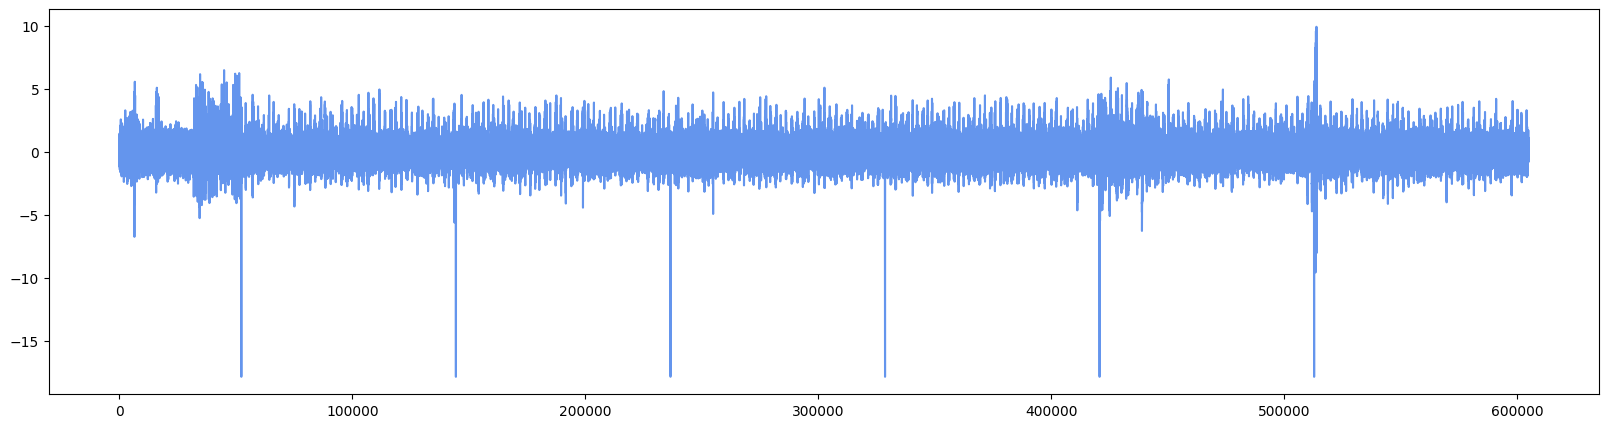

In [84]:
from scipy import signal, fft, stats # type: ignore # , fftfreq

import matplotlib.pyplot as plt # type: ignore
# import seaborn as sns         # type: ignore
# import plotly.plotly as py    # type: ignore

rw      = df_train_csv['C3'] # df_train_pkl['C3'][0]
rz      = rw.copy()
ro      = rw.copy()
n       = 25
alpha   = 1 / 2.5

# for _ in range(n) :
#     rz = Simple_exponential_smoothing(rz, alpha, 0)
#     ro = Simple_exponential_smoothing(ro, alpha)

recal = int(n / alpha)


# fig, ax = plt.subplots()
fig = plt.figure(figsize = (20, 5))
# ax1 = fig.add_axes()
# fig.add_gridspec(x = [x[0] for x in event_start], y = np.zeros(120))
# ax.grid(axis = "x")

# plt.xticks(y_pos, bars, color='orange', rotation=45, fontweight='bold', fontsize='17', horizontalalignment='right')
# plt.tick_params(axis = 'x', colors = 'red', direction = 'out', length = 13) #, width =3

plt.plot(stats.zscore(rw), color = 'cornflowerblue')
# plt.plot(stats.zscore(rz[recal: ]), 'm')
# plt.plot(stats.zscore(ro[recal: ]), '--', color = 'blue')
plt.show();

In [17]:
import mne 

sample_rate = 250 # Hz

raw_csv = df_train_csv[['C3', 'Cz', 'C4']]
raw_mne = mne.io.RawArray(raw_csv.T * 1e-6, mne.create_info(raw_csv.columns.tolist(), sample_rate, ch_types = 'eeg'))

Creating RawArray with float64 data, n_channels=3, n_times=552452
    Range : 0 ... 552451 =      0.000 ...  2209.804 secs
Ready.


EventStart
0    552332
1       120
Name: count, dtype: int64

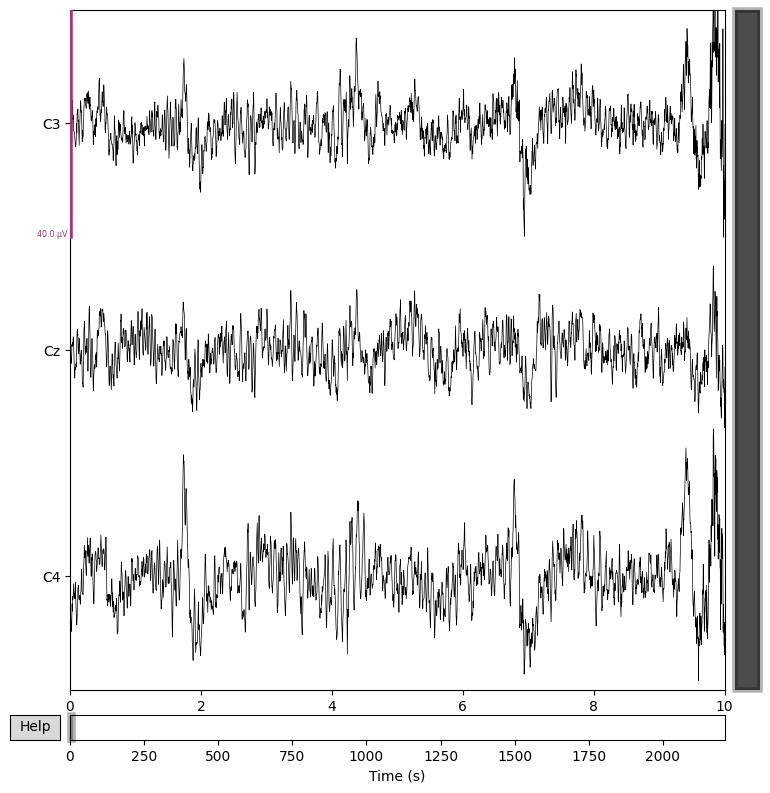

In [16]:
raw_mne.plot();